In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder

In [2]:
class NeuralNetwork:

  def __init__(self, input_size, hidden_size, output_size):

    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size


    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.zeros((1, self.output_size))


  def sigmoid(self, x):

    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, x):

    return self.sigmoid(x) * (1 - self.sigmoid(x))


  def calculate_loss(self, y_true, y_pred):

      m = y_pred.shape[0]
      loss = -1/m * np.sum(y_true * np.log(y_pred + 1e-10))
      return loss

  # correct solution:
  def softmax(self, x):
    exp_vals = np.exp(x)
    sum_exp = np.sum(exp_vals, axis=-1, keepdims=True)
    softmax_output = exp_vals / sum_exp

    return softmax_output

  def forward(self, x):

    self.z1 = np.dot(x, self.W1) + self.b1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = self.softmax(self.z2)

    return self.a2

  def backward(self, x, y, learning_rate):

    m = x.shape[0]

    dz2 = self.a2 - y
    dW2 = (1 / m) * np.dot(self.a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)
    dW1 = (1 / m) * np.dot(x.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0)



    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1



  def train(self, x, y, epochs, learning_rate):

    losslist = []

    for epoch in range(epochs):

      output = self.forward(x)
      self.backward(x, y, learning_rate)

      if epoch %100 == 0:
        loss = self.calculate_loss(y, output)
        losslist.append(loss)
        print("Epoch: ",epoch, ", Loss: ",loss)



    return losslist

  def predict(self,x):

    preds = self.forward(x)


    preds = np.argmax(preds, axis=1)

    return preds






In [3]:
def normalize(X):

    X = x/255.0

    return X

In [4]:
x, y = load_digits(return_X_y=True)

In [5]:
x.shape, y.shape

((1797, 64), (1797,))

In [6]:
x = normalize(x)
y = y.reshape(-1,1)

In [7]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y).toarray()

In [8]:
x.shape, y.shape

((1797, 64), (1797, 10))

(<matplotlib.image.AxesImage at 0x7b3ed7bb6470>,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

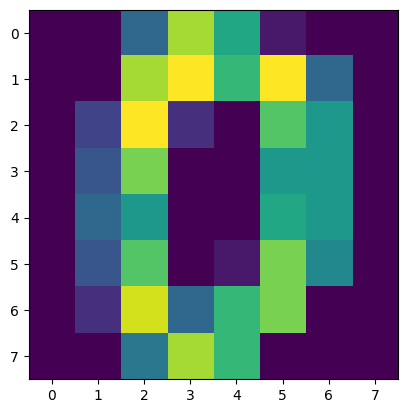

In [9]:
plt.imshow(x[0].reshape(8,8)), y[0]



In [10]:
nn = NeuralNetwork(None, None, None)

In [28]:
li = nn.train(x, y, epochs=None, learning_rate=None)

Epoch:  0 , Loss:  1.4954624433559802
Epoch:  100 , Loss:  1.4671453624359305
Epoch:  200 , Loss:  1.4390435653409832
Epoch:  300 , Loss:  1.4111949178334455
Epoch:  400 , Loss:  1.3836356349263805
Epoch:  500 , Loss:  1.356399943679137
Epoch:  600 , Loss:  1.3295198006001372
Epoch:  700 , Loss:  1.3030246651669988
Epoch:  800 , Loss:  1.2769413295156073
Epoch:  900 , Loss:  1.251293802973629
Epoch:  1000 , Loss:  1.2261032488588943
Epoch:  1100 , Loss:  1.2013879698672638
Epoch:  1200 , Loss:  1.1771634374728426
Epoch:  1300 , Loss:  1.1534423600824775
Epoch:  1400 , Loss:  1.1302347842412435
Epoch:  1500 , Loss:  1.107548222977158
Epoch:  1600 , Loss:  1.0853878053890027
Epoch:  1700 , Loss:  1.0637564417960845
Epoch:  1800 , Loss:  1.0426549991493657
Epoch:  1900 , Loss:  1.022082481910407
Epoch:  2000 , Loss:  1.002036214197138
Epoch:  2100 , Loss:  0.9825120196341154
Epoch:  2200 , Loss:  0.9635043959942559
Epoch:  2300 , Loss:  0.9450066823493162
Epoch:  2400 , Loss:  0.927011217

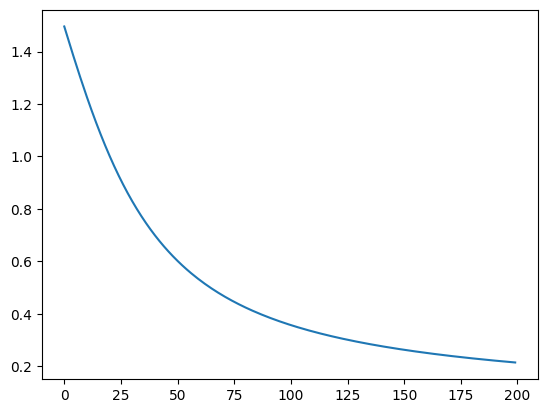

In [29]:
plt.plot(li)

In [30]:
preds = nn.predict(x)

In [31]:
def accuracy(y_true, y_pred):
   print("Accuracy:", (np.where(y_true==y_pred)[0].shape[0] / y_true.shape[0]) * 100, "%")

In [32]:
accuracy(np.argmax(y,axis=1), preds)

Accuracy: 95.71508069003896 %
